# 1. BTC/USD Dataset (Data split 7:3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 160ms/step - loss: 0.0322 - val_loss: 0.0035
Epoch 2/100
20/20 [==============================] - 2s 111ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 3/100
20/20 [==============================] - 2s 113ms/step - loss: 0.0030 - val_loss: 0.0040
Epoch 4/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 5/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 6/100
20/20 [==============================] - 2s 126ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 7/100
20/20 [==============================] - 2s 112ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 8/100
20/20 [==============================] - 2s 112ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 9/100
20/20 [==============================] - 2s 112ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 10/100
20/20 [==============================] - 2s 112ms/step - loss: 0.0019 - val_lo

In [10]:
y_pred=model.predict(X_test)

15/15 [==============================] - 1s 21ms/step


In [11]:
y_pred=scaler.inverse_transform(y_pred)

In [12]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.563902456687327
RMSE: 1322.9849954510114
MAE: 977.1085131578947


In [14]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

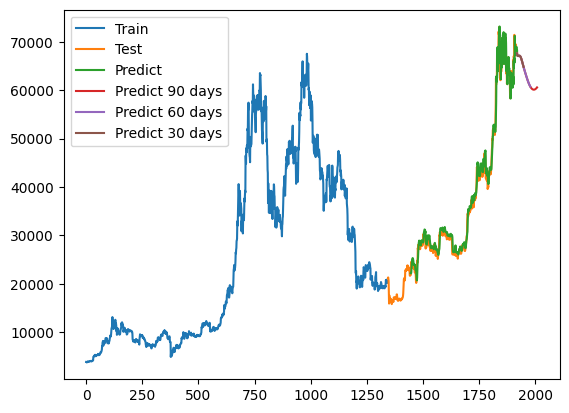

In [15]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 2. ETH/USD Dataset (Data split 7:3)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [17]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [20]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 152ms/step - loss: 0.0339 - val_loss: 0.0021
Epoch 2/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 3/100
20/20 [==============================] - 2s 112ms/step - loss: 0.0036 - val_loss: 0.0019
Epoch 4/100
20/20 [==============================] - 2s 109ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 5/100
20/20 [==============================] - 2s 105ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 6/100
20/20 [==============================] - 2s 106ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 7/100
20/20 [==============================] - 2s 106ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 8/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 9/100
20/20 [==============================] - 2s 106ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 10/100
20/20 [==============================] - 2s 109ms/step - loss: 0.0023 - val_lo

In [25]:
y_pred=model.predict(X_test)

15/15 [==============================] - 1s 21ms/step


In [26]:
y_pred=scaler.inverse_transform(y_pred)

In [27]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.4179037494470057
RMSE: 76.83483740529284
MAE: 54.207453608141435


In [29]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

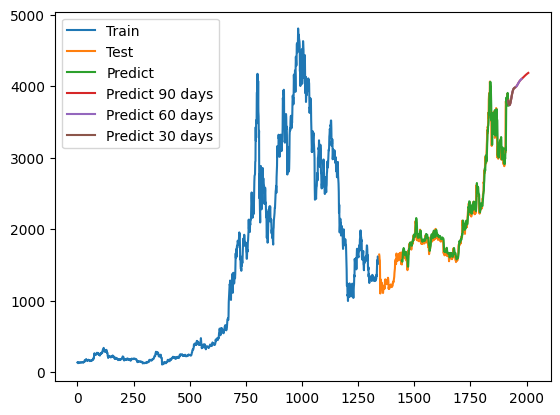

In [30]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 3. BNB/USD Dataset (Data split 7:3)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [32]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [33]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [34]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [35]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [36]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [38]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 148ms/step - loss: 0.0532 - val_loss: 0.0164
Epoch 2/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0067 - val_loss: 0.0042
Epoch 3/100
20/20 [==============================] - 2s 106ms/step - loss: 0.0043 - val_loss: 0.0030
Epoch 4/100
20/20 [==============================] - 2s 106ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 5/100
20/20 [==============================] - 2s 106ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 6/100
20/20 [==============================] - 2s 105ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 7/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 8/100
20/20 [==============================] - 2s 108ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 9/100
20/20 [==============================] - 2s 108ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 10/100
20/20 [==============================] - 2s 105ms/step - loss: 0.0025 - val_lo

In [40]:
y_pred=model.predict(X_test)

15/15 [==============================] - 1s 23ms/step


In [41]:
y_pred=scaler.inverse_transform(y_pred)

In [42]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.5378086476382986
RMSE: 11.789854873782385
MAE: 8.282780922337583


In [44]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

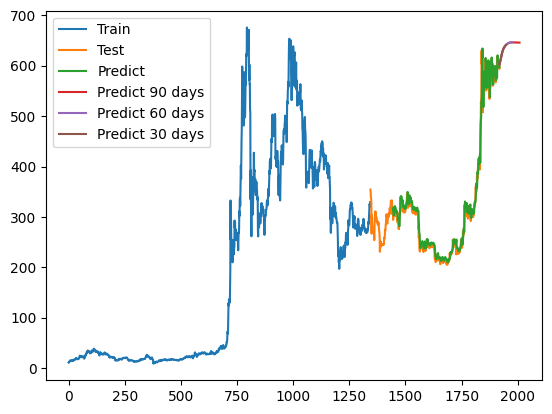

In [45]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 4. BTC/USD Dataset (Data split 8:2)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [47]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [48]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [49]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [50]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [51]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [52]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [53]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [54]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 7s 137ms/step - loss: 0.0304 - val_loss: 0.0033
Epoch 2/100
23/23 [==============================] - 2s 100ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 3/100
23/23 [==============================] - 2s 101ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 4/100
23/23 [==============================] - 2s 103ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 5/100
23/23 [==============================] - 2s 104ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 6/100
23/23 [==============================] - 2s 101ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 7/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 8/100
23/23 [==============================] - 2s 107ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 9/100
23/23 [==============================] - 2s 100ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 10/100
23/23 [==============================] - 2s 99ms/step - loss: 0.0016 - val_los

In [55]:
y_pred=model.predict(X_test)

9/9 [==============================] - 1s 21ms/step


In [56]:
y_pred=scaler.inverse_transform(y_pred)

In [57]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.3471081579503608
RMSE: 1529.3308729987943
MAE: 1112.9334363957596


In [59]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

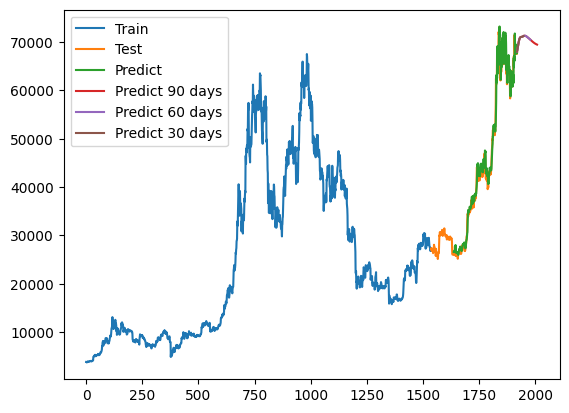

In [60]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 5. ETH/USD Dataset (Data split 8:2)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [20]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [21]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [23]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 7s 141ms/step - loss: 0.0236 - val_loss: 0.0046
Epoch 2/100
23/23 [==============================] - 2s 106ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 3/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 4/100
23/23 [==============================] - 2s 104ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 5/100
23/23 [==============================] - 3s 112ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 6/100
23/23 [==============================] - 2s 103ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 7/100
23/23 [==============================] - 2s 105ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 8/100
23/23 [==============================] - 2s 103ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 9/100
23/23 [==============================] - 3s 111ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 10/100
23/23 [==============================] - 2s 104ms/step - loss: 0.0018 - val_lo

In [28]:
y_pred=model.predict(X_test)

9/9 [==============================] - 1s 21ms/step


In [30]:
y_pred=scaler.inverse_transform(y_pred)

In [ ]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.8321305991718853
RMSE: 97.2070630502502
MAE: 71.16988569387698


In [32]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

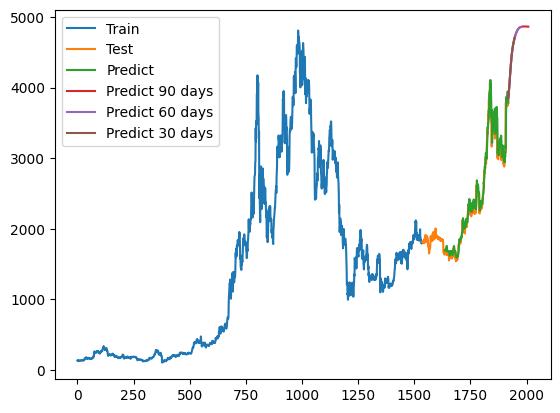

In [33]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 6. BNB/USD Dataset (Data split 8:2)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [35]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [36]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [37]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [38]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [39]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [40]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [42]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 7s 135ms/step - loss: 0.0320 - val_loss: 0.0054
Epoch 2/100
23/23 [==============================] - 2s 98ms/step - loss: 0.0049 - val_loss: 0.0060
Epoch 3/100
23/23 [==============================] - 2s 103ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 4/100
23/23 [==============================] - 2s 101ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 5/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 6/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 7/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 8/100
23/23 [==============================] - 2s 101ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 9/100
23/23 [==============================] - 2s 100ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 10/100
23/23 [==============================] - 2s 99ms/step - loss: 0.0023 - val_loss

In [43]:
y_pred=model.predict(X_test)

9/9 [==============================] - 1s 21ms/step


In [44]:
y_pred=scaler.inverse_transform(y_pred)

In [45]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 3.185960604722391
RMSE: 19.811081765335228
MAE: 13.401096982922232


In [47]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

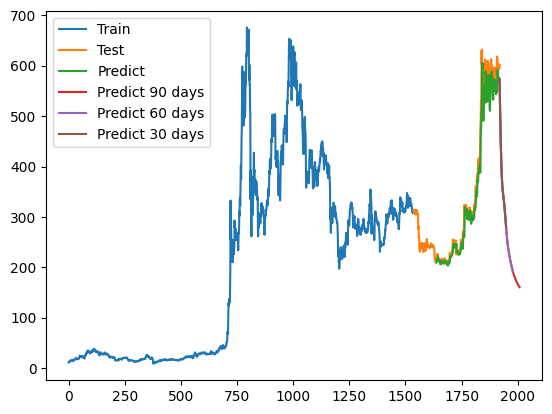

In [48]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 7. BTC/USD Dataset (Data split 9:1)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [17]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [20]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 7s 129ms/step - loss: 0.0206 - val_loss: 0.0052
Epoch 2/100
26/26 [==============================] - 2s 94ms/step - loss: 0.0027 - val_loss: 0.0051
Epoch 3/100
26/26 [==============================] - 3s 97ms/step - loss: 0.0019 - val_loss: 0.0052
Epoch 4/100
26/26 [==============================] - 3s 97ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 5/100
26/26 [==============================] - 3s 97ms/step - loss: 0.0017 - val_loss: 0.0063
Epoch 6/100
26/26 [==============================] - 2s 95ms/step - loss: 0.0016 - val_loss: 0.0066
Epoch 7/100
26/26 [==============================] - 2s 96ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 8/100
26/26 [==============================] - 2s 93ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 9/100
26/26 [==============================] - 2s 94ms/step - loss: 0.0014 - val_loss: 0.0051
Epoch 10/100
26/26 [==============================] - 2s 94ms/step - loss: 0.0014 - val_loss: 0.004

In [25]:
y_pred=model.predict(X_test)

3/3 [==============================] - 1s 21ms/step


In [26]:
y_pred=scaler.inverse_transform(y_pred)

In [27]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.953826673722848
RMSE: 2504.091403679821
MAE: 1967.7119419642859


In [29]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

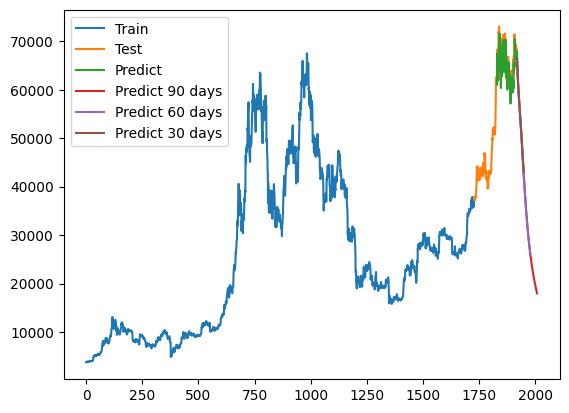

In [30]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 8. ETH/USD Dataset (Data split 9:1)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [47]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [48]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [49]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [50]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [51]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [52]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [53]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [54]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 7s 126ms/step - loss: 0.0251 - val_loss: 0.0062
Epoch 2/100
26/26 [==============================] - 2s 96ms/step - loss: 0.0034 - val_loss: 0.0056
Epoch 3/100
26/26 [==============================] - 3s 98ms/step - loss: 0.0027 - val_loss: 0.0053
Epoch 4/100
26/26 [==============================] - 3s 99ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 5/100
26/26 [==============================] - 3s 102ms/step - loss: 0.0022 - val_loss: 0.0049
Epoch 6/100
26/26 [==============================] - 3s 100ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 7/100
26/26 [==============================] - 3s 100ms/step - loss: 0.0020 - val_loss: 0.0042
Epoch 8/100
26/26 [==============================] - 3s 99ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 9/100
26/26 [==============================] - 3s 99ms/step - loss: 0.0018 - val_loss: 0.0044
Epoch 10/100
26/26 [==============================] - 3s 98ms/step - loss: 0.0017 - val_loss: 0.

In [55]:
y_pred=model.predict(X_test)

3/3 [==============================] - 1s 22ms/step


In [56]:
y_pred=scaler.inverse_transform(y_pred)

In [57]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.692477958921642
RMSE: 129.90294213143525
MAE: 91.17485469608515


In [59]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

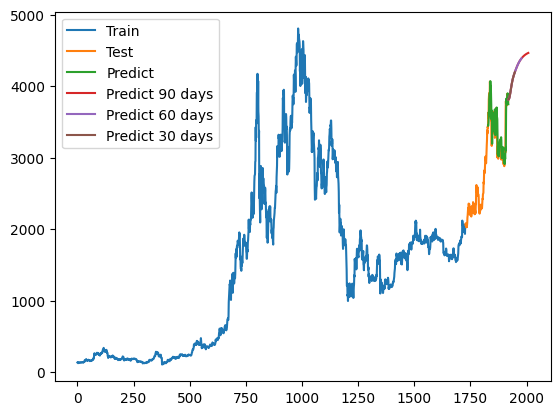

In [60]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 9. BNB/USD Dataset (Data split 9:1)

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [62]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [63]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [64]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [65]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [66]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [67]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [68]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [69]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 8s 135ms/step - loss: 0.0291 - val_loss: 0.0038
Epoch 2/100
26/26 [==============================] - 3s 104ms/step - loss: 0.0044 - val_loss: 0.0135
Epoch 3/100
26/26 [==============================] - 3s 110ms/step - loss: 0.0033 - val_loss: 0.0050
Epoch 4/100
26/26 [==============================] - 3s 114ms/step - loss: 0.0031 - val_loss: 0.0056
Epoch 5/100
26/26 [==============================] - 3s 115ms/step - loss: 0.0027 - val_loss: 0.0054
Epoch 6/100
26/26 [==============================] - 3s 116ms/step - loss: 0.0025 - val_loss: 0.0080
Epoch 7/100
26/26 [==============================] - 3s 113ms/step - loss: 0.0026 - val_loss: 0.0059
Epoch 8/100
26/26 [==============================] - 3s 113ms/step - loss: 0.0023 - val_loss: 0.0070
Epoch 9/100
26/26 [==============================] - 3s 111ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 10/100
26/26 [==============================] - 3s 114ms/step - loss: 0.0019 - val_lo

In [70]:
y_pred=model.predict(X_test)

3/3 [==============================] - 1s 22ms/step


In [71]:
y_pred=scaler.inverse_transform(y_pred)

In [72]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 3.0731364815528894
RMSE: 22.638907155245327
MAE: 17.202026769617106


In [74]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

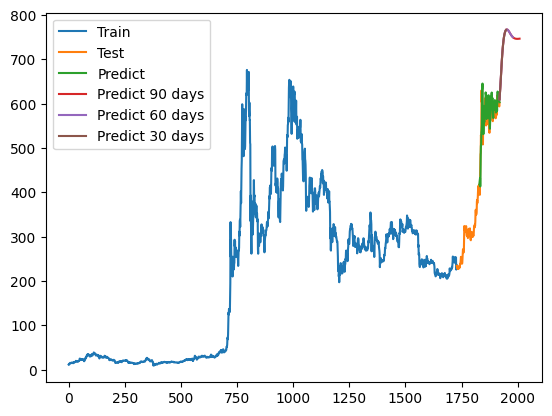

In [75]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()